In [30]:
import pandas as pd
import networkx as nx
from tqdm import tqdm_notebook as tqdm


# Transactions

In [9]:
transactions=pd.read_csv("archive/transactions.csv")

In [27]:
transactions

,hash,nonce,block_hash,block_number,transaction_index,from_address,to_address,value,gas,gas_price,input,block_timestamp
0,0x7d1b7b2fc765c711fd58a8165bd70ea8756875d1a03b...,231257,0x388f34dd94b899f65bbd23006ee93d61434a2f2a5705...,9000000,77,0x8c4b7870fc7dff2cb1e854858533ceddaf3eebf4,NaN,0,1200000,12292867598,0x60606040526001805460ff1916905534156100195760...,1574706444
1,0xb61f2bd6d46907e38f60d8d817039567f2f1b1392e78...,231258,0x388f34dd94b899f65bbd23006ee93d61434a2f2a5705...,9000000,78,0x8c4b7870fc7dff2cb1e854858533ceddaf3eebf4,NaN,0,1200000,12292867598,0x60606040526001805460ff1916905534156100195760...,1574706444
2,0xd98c4da1c618758db53b54e1ec9717b60e35cc9523fa...,231259,0x388f34dd94b899f65bbd23006ee93d61434a2f2a5705...,9000000,79,0x8c4b7870fc7dff2cb1e854858533ceddaf3eebf4,NaN,0,1200000,12292867598,0x60606040526001805460ff1916905534156100195760...,1574706444
3,0xc2d018922e1d372a8e5cc6c9e11d66ad06dc97e26180...,83,0x388f34dd94b899f65bbd23006ee93d61434a2f2a5705...,9000000,0,0xea193cb28cf6150b4cbaf0cfe7b39241e28091a7,0xf5bec430576ff1b82e44ddb5a1c93f6f9d0884f3,49145610000000000,166666,50000000000,0x,1574706444
4,0x0c13f305c217c797f9d9156d5292507e68cb2bb8b84a...,412,0x388f34dd94b899f65bbd23006ee93d61434a2f2a5705...,9000000,1,0xdd2a6795422100e5f2c4e30c5a6f7553e81baab9,0x44f14099b8b9c60515e83a0cb1a85e14982bb091,97260220000000000,21000,50000000000,0x,1574706444
...,...,...,...,...,...,...,...,...,...,...,...,...
43473471,0xd26874993727ef3cf7a8e1123073e07e79a4d6f40d17...,6,0x7fa40deb8017ab7b4a3cb3e2eb0bad600276d848c1aa...,12622775,161,0x7e5ee0d2f3e27e9ef60da2b34d1741dc0402b2da,0x81e19d10a3fb3e1ab11072e79f53cace1c424b2a,233664000000000000,21000,8000000000,0x,1623542242
43473472,0x7968f08adf532f427db759ecc5b17e0ec0e8c1e6ebdd...,373240,0x7fa40deb8017ab7b4a3cb3e2eb0bad600276d848c1aa...,12622775,162,0x29d5527caa78f1946a409fa6acaf14a0a4a0274b,0x10674f9ae381ee964f537e90ac9864cab60bfb50,1246826860000000000,42000,8000000000,0x,1623542242
43473473,0x885507e5cccdfdcbb43fc955bf6630d7843e7b1bb7eb...,2,0x7fa40deb8017ab7b4a3cb3e2eb0bad600276d848c1aa...,12622775,163,0xa39fb62571c7444f83195809f7d1b9ffb6d9e8f0,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0,73170,8000000000,0xa9059cbb000000000000000000000000cdc9044201c3...,1623542242
43473474,0x6c517f83f336e52fc37ac4279ef069ba51c5e53cdf62...,4,0x7fa40deb8017ab7b4a3cb3e2eb0bad600276d848c1aa...,12622775,164,0x9cb463bba50eb91643d824e680b4bab55d7f4f64,0x283af0b28c62c092c9727f1ee09c02ca627eb7f5,0,46267,8000000000,0xf14fcbc87b86eb022ef0e6c17668d612470b5694e4e6...,1623542242


In [28]:
ndoes=set(transactions["from_address"]).union(transactions["to_address"])

In [29]:
edges=[(transactions["from_address"][i],transactions["to_address"][i]) for i in transactions.index]
len(edges)

43473476

In [33]:
G=nx.DiGraph()

In [34]:
G.add_edges_from(edges)

In [37]:
nx.write_gml(G,"Transaction_Di_graph.gml")

# Centrality

In [52]:
def betweenness_centrality(G):
    
    V=G.nodes()
    pbar=tqdm(total=len(V))
    btw={}
    for s in V:
        btw[s]=0.0
    ii=0
    for s  in V:
        ii+=1
        print(ii)
        pbar.update(1)
        #single-source shortest paths problem
        #initialization
        pred={}
        dist={}
        sigma={}
        Q=[]
        stack=[]
        for w in V:
            pred[w]=[]
            dist[w]=-1
            sigma[w]=0
            
        dist[s]=0
        sigma[s]=1
        Q.append(s)
        
        while len(Q)!=0:
            v=Q.pop(0)
            stack.append(v)
            for w in G.neighbors(v):
                #path discovery
                if dist[w]==-1:
                    dist[w]=dist[v]+1
                    
                    Q.append(w)
                #path counting
                if dist[w]==dist[v]+1:
                    sigma[w]=sigma[w]+sigma[v]
                    dist[w]=dist[v]+1
                    
                    pred[w].append(v)
        #accumulation
        delta={}
        for v in V:
            delta[v]=0
        while len(stack)!=0:
            w=stack.pop()
            for v in pred[w]:
                delta[v]=delta[v]+(sigma[v]/sigma[w])*(1+delta[w])
            if w !=s:
                btw[w]=btw[w]+delta[w]
        
    return btw
            
           

# Remove Nodes wirh less than K nodes

In [50]:
G.degree()
remove = [node for node,degree in dict(G.degree()).items() if degree < 20]

In [53]:
G_=G.copy()
G_.remove_nodes_from(remove)
len(G_.nodes())

40152

In [126]:
len(G_.edges())

333768

In [88]:
df=pd.DataFrame(index=betweenness.keys(),columns=["Betweenness","Closeness","Degree"])

# BTW

In [117]:
betweenness=betweenness_centrality(G)
max_=max(betweenness.values())
max_degree=sorted(G.degree, key=lambda x: x[1], reverse=True)[0][1]
for i in df.index:
    df["Betweenness"][i]=betweenness[i]/max_
    df["Degree"][i]=G.degree(i)/max_degree

In [ ]:
matrix=df.sort_values(["Betweenness"."Degree"],ascending=False).head(50)
matrix

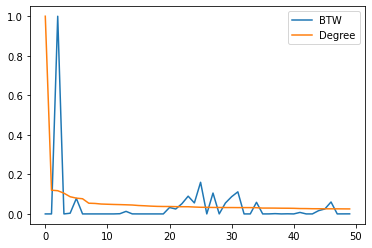

In [125]:
import matplotlib.pyplot as plt
indx=[i for i in range(50)]
plt.plot(indx,matrix.Betweenness,label="BTW")
plt.plot(indx,matrix.Degree,label="Degree")
plt.legend()

# Degree Centrality

In [127]:
degree_centrality=nx.degree_centrality(G)

In [128]:
degree_centrality

{'0x8c4b7870fc7dff2cb1e854858533ceddaf3eebf4': 0.00027451530556694905,
 nan: 0.001334736966859327,
 '0xea193cb28cf6150b4cbaf0cfe7b39241e28091a7': 5.35465485501201e-07,
 '0xf5bec430576ff1b82e44ddb5a1c93f6f9d0884f3': 0.002503836610203616,
 '0xdd2a6795422100e5f2c4e30c5a6f7553e81baab9': 2.7130251265394185e-05,
 '0x44f14099b8b9c60515e83a0cb1a85e14982bb091': 0.00030878509663902594,
 '0x2e1809d345216aa72833ba5f2881885c2999c103': 1.78488495167067e-07,
 '0xe5caef4af8780e59df925470b050fb23c43ca68c': 0.0002168635216279864,
 '0x6748f50f686bfbca6fe8ad62b22228b87f31ff2b': 3.070002116873553e-05,
 '0xb62132e35a6c13ee1ee0f84dc5d40bad8d815206': 0.0006088242570148656,
 '0x442bc47357919446eabc18c7211e57a13d983469': 5.675934146312731e-05,
 '0xd8a83b72377476d0a66683cde20a8aad0b628713': 0.004810443433247623,
 '0xf91499a8bdfa646804ea0fac1fc5df9ee8060bc6': 1.427907961336536e-06,
 '0xadb2b42f6bd96f5c65920b9ac88619dce4166f94': 2.2846527381384576e-05,
 '0xb7cb1c96db6b22b0d3d9536e0108d062bd488f74': 0.0006118585614

In [140]:
df["Degree_Centrality"]=0.

In [141]:
for i in df.index:
    df["Degree_Centrality"][i]=degree_centrality[i]

/tmp/ipykernel_260479/1893939110.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Degree_Centrality"][i]=degree_centrality[i]


In [142]:
matrix=df.sort_values(["Betweenness","Degree","Degree_Centrality"],ascending=False).head(50)

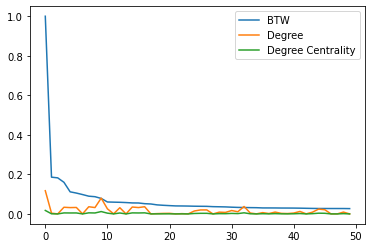

In [143]:
indx=[i for i in range(50)]
plt.plot(indx,matrix.Betweenness,label="BTW")
plt.plot(indx,matrix.Degree,label="Degree")
plt.plot(indx,matrix.Degree_Centrality,label="Degree Centrality")
plt.legend()

# Closeness Centrality

In [145]:
import numpy as np
import scipy.sparse
import scipy.sparse.csgraph

In [ ]:
A = nx.adjacency_matrix(G_).tolil()
D = scipy.sparse.csgraph.floyd_warshall( \
             A, directed=False, unweighted=False)

In [ ]:
from tqdm import tqdm